<a href="https://www.kaggle.com/code/kelixirr/titanic-survivors-end-to-end-project?scriptVersionId=135782761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Titanic Surviors Prediction Using Machine Learning
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

0 = No, 1 = Yes

### Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

### Data 
*pclass*: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp*: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

*parch*: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [1]:
# Importing the important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

We already have the test set and training set so we don't need to create them. 

Let's analyse the training set and see what we can do. 

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# let's check for dtypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# let's check for shape
df.shape

(891, 12)

In [6]:
# let's check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We seem to have several missing values in our data. 

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# checking for duplicate values 
df.duplicated().sum()

0

We don't have duplicate values

In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We can remove the column "Ticket" And "Cabin" because it does not seem to have any relationship with the accident unless other features are involved.

In [11]:
new_df = df.drop(["Ticket", "Cabin"], axis=1)

In [12]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Exploratory Data Analysis (EDA)

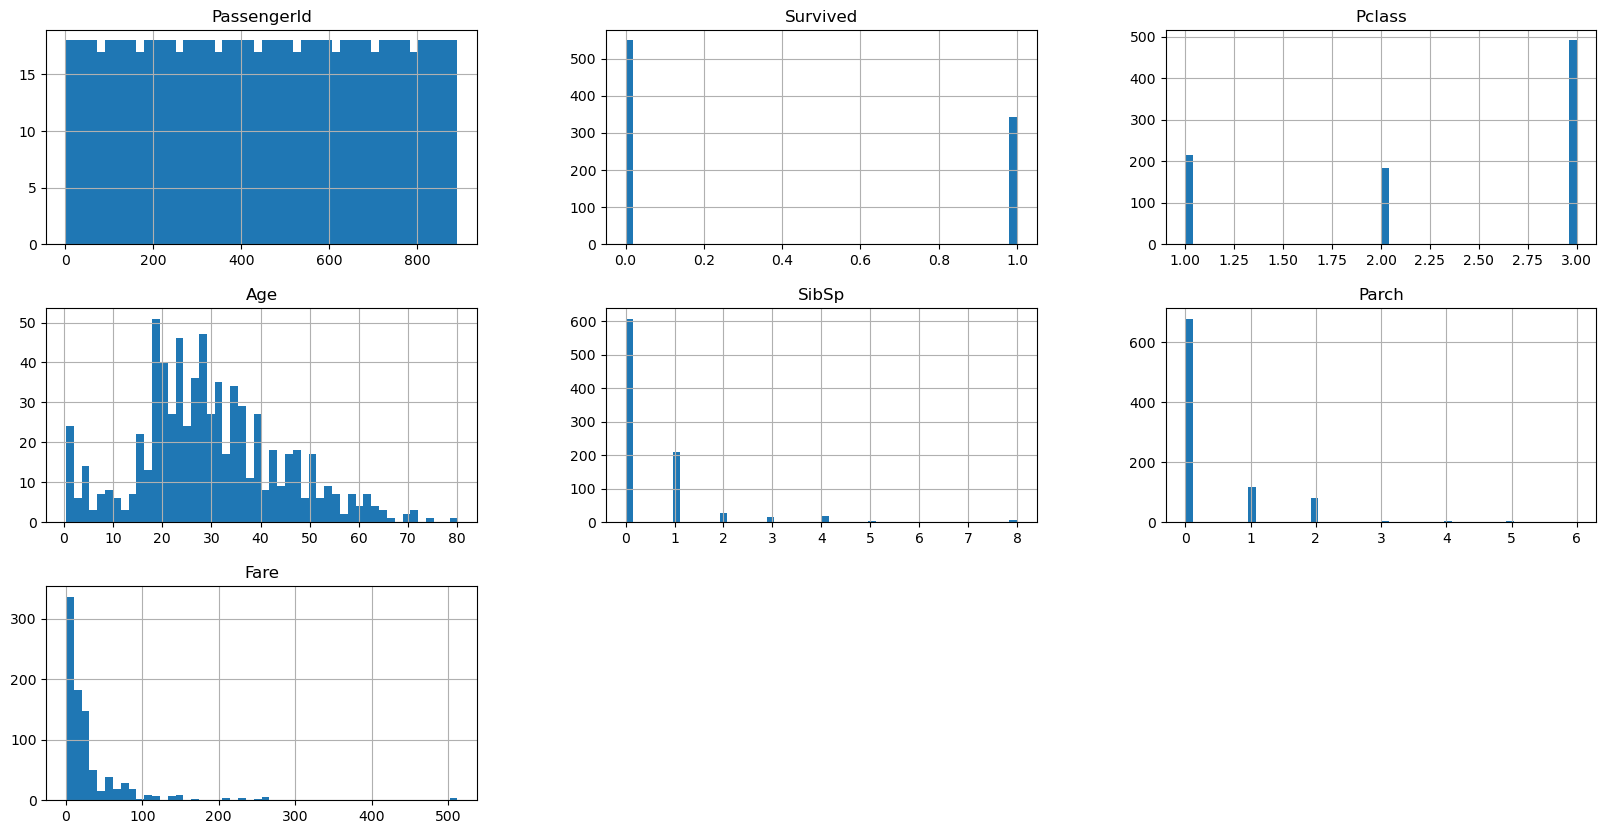

In [13]:
# let's check the data distribution 
new_df.hist(bins=50, figsize=(20,10))
plt.show()

In [14]:
# let's check for the correlation
corr = new_df.corrwith(new_df["Survived"], numeric_only=True)

In [15]:
corr.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
dtype: float64

As we can see there is huge correlation between fare and survival. Pclass may not give us clear idea unless we compare the particular type. Let's plot the graph and see. 

In [16]:
new_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

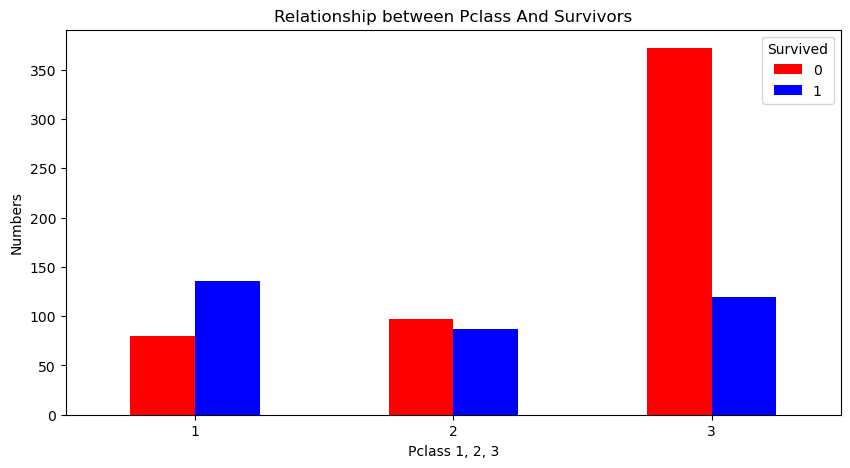

In [17]:
pd.crosstab(new_df.Pclass, df.Survived).plot(kind="bar", figsize=(10,5),  color=["red", "blue"])

plt.title("Relationship between Pclass And Survivors")
plt.ylabel("Numbers")
plt.xlabel("Pclass 1, 2, 3")
plt.xticks(rotation=0);

In [18]:
pd.crosstab(new_df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


As we can see that the people from 3rd class did not survive as much as people from 1st class. Notice we also have higher number of individuals in 3rd class. 

In [19]:
pd.crosstab(new_df.Parch, new_df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [20]:
pd.crosstab(new_df.SibSp, new_df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [21]:
pd.crosstab(new_df.Sex, new_df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


As we can see women survived more than men. 

Let's create a new feature from the name feature as these names could be of important individuals and their survivals may show some correlation with the names. 

In [22]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [23]:
def title_feature(df):
    
    # Creating new feature
    df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    #Replacing the rare titles with other
    df["Title"] = df["Title"].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Other")
    
    #Replacing other titles with common ones =
    df["Title"] = df["Title"].replace("Mlle", "Miss")
    df["Title"] = df["Title"].replace("Ms", "Miss")
    df["Title"] = df["Title"].replace("Mme", "Mrs")
    
    #converting to ordinal form 
    map_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(map_dict)
    df['Title'] = df['Title'].fillna(0)
    

title_feature(new_df)

Although based on the names here we don't seem to seeing any relationship with the title and survival because we don't see any such title biasedness here. 

In [24]:
# Removing other unnecassary features
train_df = new_df.drop(["Name", "PassengerId"], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,3.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,3.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


In [25]:
train_df.shape

(891, 9)

In [26]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [27]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title       float64
dtype: object

In [28]:
# converting sex feature to One Hot Encoder
from sklearn.preprocessing import LabelEncoder
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])

In [29]:
# let's convert other categorical variable into numbers as well
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])


In [30]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [31]:
# We can now fill the missing values in Age 
train_df.fillna({"Age": df["Age"].median()}, inplace=True)

In [32]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [33]:
train_df.shape

(891, 9)

Well now we have removed our missing values. We can now create our models and start. Before we do that let's create a training and validation set so that we can evaluate our model and once we are done we can then test our model on test data. This is done to prevent the data snooping. 

In [34]:
X = train_df.drop("Survived", axis=1)

In [35]:
y = train_df["Survived"]

In [36]:
# creating training and validation set 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [37]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((846, 8), (846,), (45, 8), (45,))

## Training Our Models

Please note this is a classification problem not prediction problem. Obviously one can frame any problem in prediction manner but here we will be using classification models. 

### Logistic Regression

In [38]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=200)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [39]:
y_pred = model_1.predict(X_val)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1])

In [40]:
y_predict_prob = model_1.predict_proba(X_val)
y_predict_prob

array([[0.41932343, 0.58067657],
       [0.80438301, 0.19561699],
       [0.89923591, 0.10076409],
       [0.16007073, 0.83992927],
       [0.31989597, 0.68010403],
       [0.06400655, 0.93599345],
       [0.35473361, 0.64526639],
       [0.95112478, 0.04887522],
       [0.29108168, 0.70891832],
       [0.11680338, 0.88319662],
       [0.69943719, 0.30056281],
       [0.94114644, 0.05885356],
       [0.78564787, 0.21435213],
       [0.87174959, 0.12825041],
       [0.82164968, 0.17835032],
       [0.07805759, 0.92194241],
       [0.72471182, 0.27528818],
       [0.35467595, 0.64532405],
       [0.90831597, 0.09168403],
       [0.65404071, 0.34595929],
       [0.90772233, 0.09227767],
       [0.59908299, 0.40091701],
       [0.47397325, 0.52602675],
       [0.89886058, 0.10113942],
       [0.91391546, 0.08608454],
       [0.72198776, 0.27801224],
       [0.73316271, 0.26683729],
       [0.80312863, 0.19687137],
       [0.69177333, 0.30822667],
       [0.43368523, 0.56631477],
       [0.

In [41]:
score_1 = model_1.score(X_val, y_val)
round(score_1*100, 2)

80.0

##### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression(max_iter=200, random_state = 42)
scores = cross_val_score(log_reg, X, y, cv=5) 
scores.mean()

0.8215303496327915

### Support Vector Machines

In [43]:
from sklearn.svm import SVC

model_2 = SVC().fit(X_train, y_train)

In [44]:
y_pred_2 = model_2.predict(X_val)
y_pred_2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [45]:
score_2 = model_2.score(X_val, y_val)
score_2

0.6

##### Cross Val Score

In [46]:
SVM = SVC(random_state=42)
scores = cross_val_score(SVM, X, y, cv=5)
scores.mean()

0.6734982110350888

### SGD

In [47]:
from sklearn.linear_model import SGDClassifier
model_3 = SGDClassifier().fit(X_train, y_train)
y_pred_3 = model_3.predict(X_val)
y_pred_3

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0])

In [48]:
score_3 = model_3.score(X_val, y_val)
round(score_3*100, 2)

75.56

You can also try by applying different losses here. 

In [49]:
model_3_1 = SGDClassifier(loss = "log_loss").fit(X_train, y_train)
y_pred_3_1 = model_3_1.predict(X_val)
score_3_1 = model_3_1.score(X_val, y_val)
score_3_1

0.7333333333333333

##### Cross Val Score

In [50]:
sgd = SGDClassifier(random_state = 42)
scores = cross_val_score(sgd, X, y, cv=5)
scores.mean()

0.6913125353085181

### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_4 = model_4.predict(X_val)
y_pred_4

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0])

In [52]:
score_4 = model_4.score(X_val, y_val)
round(score_4 *100, 2)

82.22

##### Cross Val Score

In [53]:
dt = DecisionTreeClassifier(random_state = 42)
scores = cross_val_score(dt, X, y, cv = 5)
scores.mean()

0.7744586027242483

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

model_5 = RandomForestClassifier().fit(X_train, y_train)
y_pred_5 = model_5.predict(X_val)

In [55]:
y_pred_5

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0])

In [56]:
score_5 = model_5.score(X_val, y_val)
score_5

0.8222222222222222

##### Cross Validation

In [57]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=5)
scores.mean()

0.8036218693114053

### K-Nearest Neighbors 

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model_6 = KNeighborsClassifier().fit(X_train, y_train)
y_pred_6 = model_6.predict(X_val)
y_pred_6

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0])

In [59]:
score_6 = model_6.score(X_val, y_val)
score_6

0.8

checking with different parameters

In [60]:
# try to hypertune the paramater to see if the performance improves

train_scores = []
val_scores = []
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(knn.score(X_val, y_val))
    


In [61]:
train_scores

[0.9680851063829787,
 0.8451536643026005,
 0.8486997635933806,
 0.8297872340425532,
 0.8191489361702128,
 0.7966903073286052,
 0.7966903073286052,
 0.789598108747045,
 0.7907801418439716,
 0.7706855791962175,
 0.7635933806146572,
 0.7683215130023641,
 0.7683215130023641,
 0.7600472813238771,
 0.764775413711584,
 0.7529550827423168,
 0.74822695035461,
 0.7387706855791962,
 0.7411347517730497,
 0.7458628841607565]

In [62]:
val_scores

[0.7111111111111111,
 0.6222222222222222,
 0.8,
 0.7555555555555555,
 0.8,
 0.7777777777777778,
 0.7555555555555555,
 0.6888888888888889,
 0.7555555555555555,
 0.7333333333333333,
 0.6666666666666666,
 0.7111111111111111,
 0.7111111111111111,
 0.7333333333333333,
 0.7111111111111111,
 0.7111111111111111,
 0.7111111111111111,
 0.6888888888888889,
 0.6888888888888889,
 0.6666666666666666]

Max score on validation set is: 0.80%


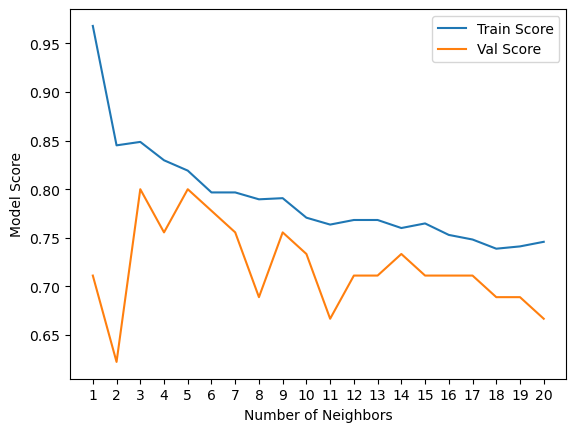

In [63]:
# let's create a graph to see how our model performed on test and val data

plt.plot(neighbors, train_scores, label ="Train Score")
plt.plot(neighbors, val_scores, label = "Val Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max score on validation set is: {max(val_scores):.2f}%")

##### cross val scores

In [64]:
knc = KNeighborsClassifier()
scores = cross_val_score(knc, X, y, cv = 5)
scores.mean()

0.7149582574854059

As we can see the accuracy is max 80% without cross val and 71% with cross val which is fine but not as good as our Random Forest. So, we will discard this. 

Let's select the Random Forest Classifier and hypertune to see what we can achieve

## Hyperparameter Tuning 

In [65]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

param_grid = {
    
    "n_estimators": np.arange(10, 100, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=2)

In [66]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 18,
 'n_estimators': 60}

In [67]:
# best estimator output
grid_search.best_estimator_.score(X_val, y_val)

0.8

In [68]:
# let's try Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = param_grid,
                           cv=5,
                           n_iter = 20,
                           verbose = 2) 
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, m

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=2)

In [69]:
rs_rfc.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [70]:
rs_rfc.score(X_val, y_val)  

0.8

Well seems like we have improved a lot. We can select this model and evaluate our model now on actual Data that is our test data but first we need to make the data similiar to training data

In [71]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
86,3,1,16.0,1,3,34.3750,2,1.0
67,3,1,19.0,0,0,8.1583,2,1.0
350,3,1,23.0,0,0,9.2250,2,1.0
210,3,1,24.0,0,0,7.0500,2,1.0
659,1,1,58.0,0,2,113.2750,0,1.0
...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2,2.0
270,1,1,28.0,0,0,31.0000,2,1.0
860,3,1,41.0,2,0,14.1083,2,1.0
435,1,0,14.0,1,2,120.0000,2,2.0


In [72]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
# we can get rid of unnecesaary columns

# function to drop columns
def remove_col(data):
    
    data.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis = 1, inplace = True)
    

# function to modify our data for testing or evaluation
def modify_data(data):
    
    title_feature(data)  # we created this function earlier
    remove_col(data)     # once we have title we can remove cols 
    
    # Label Encoding the categorical data 
    data["Sex"] = LabelEncoder().fit_transform(data["Sex"])        
    data["Embarked"] = LabelEncoder().fit_transform(data["Embarked"])
    
    return data 

In [74]:
test_df = test_data.copy()

In [75]:
test_df = modify_data(test_df)
test_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,1,1.0
1,3,0,47.0,1,0,7.0000,2,3.0
2,2,1,62.0,0,0,9.6875,1,1.0
3,3,1,27.0,0,0,8.6625,2,1.0
4,3,0,22.0,1,1,12.2875,2,3.0


In [76]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [77]:
test_df.fillna({  
    "Age": test_df["Age"].median(),
    "Fare": test_df["Fare"].median()
}, inplace = True)

In [78]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Evaluating Our Best Model On Test Data

In [79]:
best_model = rs_rfc.best_estimator_
y_pred = best_model.predict(test_df)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
survivors_report = pd.DataFrame({
    
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred
})

survivors_report.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
# exporting our data 
survivors_report.to_csv("submission.csv", index = False)